In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import copy
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

file_location = r"C:\Users\Fabio\OneDrive\Documents\Studies\Econophysics\econophysics-project\Data\tiingo_eco_1min\msft.csv"

In [42]:
def return_price_dynamic_data(df_input=file_location, price_string="Close*", return_plot=True, scale_to_first_value=True):

    df_close = extract_close_value(df_input=df_input, price_string=price_string, scale_to_first_value=scale_to_first_value)
    
    #calculate deltas
    df_close["delta"] = np.zeros(len(df_close.index))
    for i in df_close.index[1:]:
        df_close.loc[i, "delta"] = df_close[price_string][i - 1] - df_close[price_string][i]
    df_close["delta"][0] = df_close["delta"][1]

    #produce plots and return values
    if return_plot == True:
        fig, axs = plt.subplots(2)
        fig.suptitle('Vertically stacked subplots')
        axs[0].plot(df_close[price_string])
        axs[1].plot(df_close["delta"])
        return fig, df_close
    elif return_plot == False:
        return df_close

def extract_close_value(df_input=file_location, price_string="Close*", scale_to_first_value=True):
    if isinstance(df_input, str):
        df = pd.read_csv(df_input)
    else:
        df = df_input
    
    #df = df[::100]
    
    #handle strings
    if isinstance(df[price_string][0], str):
        df[price_string] = df[price_string].str.replace(',','')
        df[price_string] = df[price_string].astype(float)
    df_close     = pd.DataFrame(df[price_string])
    
    if scale_to_first_value == True:
        scale = df_close[price_string][0]
        df_close[price_string] = df_close[price_string] / scale
    return df_close

def convert_close_to_velocity(df):
    output = []
    for i, j in zip(df["close"][1:], df["close"][:-1]):
        output = output + [float(i) - float(j)]
    df_output = pd.DataFrame(output, columns=["close"], index=df.index[1:])
    return df_output
    
    
    

#def run_analysis_on_folder(folder_location_list=["C:\\Users\\Fabio\\OneDrive\\Documents\\Studies\\Econophysics\\Analysis\\Data\\h_us_txt\\data\\hourly\\us\\nasdaq stocks\\1"], price_string="<CLOSE>", return_plot=False, scale_to_first_value=True, cap_analysis_at_file_qty=20):
#    delta_table = pd.DataFrame(columns=["delta"])    
#    file_count = 0
#    for folder_path in folder_location_list:
#        for filename in os.listdir(folder_path):
#            if file_count < cap_analysis_at_file_qty:
#                file = os.path.join(folder_path, filename)
#                file_count += 1
#                temp = return_price_dynamic_data(df_input=file, price_string=price_string, return_plot=return_plot, scale_to_first_value=scale_to_first_value)
#                delta_table = pd.concat([delta_table, pd.DataFrame(temp["delta"])], ignore_index=True) 
#    
#    return delta_table



def return_sigma_delta_t(df_input=file_location, price_string="close", return_change_in_velocity=False, return_plot=True, scale_to_first_value=True, delta_ts=range(1, 11)):
    sigma_delta = dict()
    df = extract_close_value(df_input=df_input, price_string=price_string, scale_to_first_value=scale_to_first_value)
    if return_change_in_velocity == True:
        df_velocity = convert_close_to_velocity(df)
    
    
    sigma_delta_t = []
    
    #calculate deltas
    for incri in delta_ts:
        #df[str(incri)] = np.nan(len(df.index))
        df[str(int(incri))] = np.nan
        for time_step in df.index[int(incri):]:
            df.loc[time_step, str(int(incri))] = df[price_string][time_step - incri] - df[price_string][time_step]
        r = df[str(incri)].std()
        sigma_delta[str(int(incri))] = r
        print(str(incri) + ":" + str(r))
    return sigma_delta, df, df_velocity

time_steps_inputs=[1e0, 2e0, 3e0, 4e0, 5e0, 6e0, 7e0, 8e0, 9e0, 1e1, 2e1, 3e1, 4e1, 5e1, 6e1, 7e1, 8e1, 9e1, 1e2, 2e2, 3e2, 4e2, 5e2, 6e2, 7e2, 8e2, 9e2, 1e3, 2e2, 3e2, 4e2, 5e2, 6e2, 7e2, 8e2, 9e2, 1e3]

results, df, df_velocity = return_sigma_delta_t(df_input=file_location, delta_ts=time_steps_inputs, return_change_in_velocity=True)#

print(results)

Please copy the results into this markup cell:

{'1': 0.0032045201803123516, '2': 0.004528424452189853, '3': 0.005538525816512876, '4': 0.006388793178957317, '5': 0.007136640473178932, '6': 0.0078100441919344045, '7': 0.008428490111898052, '8': 0.009005054720234525, '9': 0.009549792670285873, '10': 0.010061890490620588, '20': 0.014166073324460769, '30': 0.017321202087545125, '40': 0.020002110908091893, '50': 0.022361130126193163, '60': 0.024496654807211707, '70': 0.026478903897898306, '80': 0.028341692360473424, '90': 0.030080629031601382, '100': 0.031709069833486724, '200': 0.045080750283957034, '300': 0.05496757947963504, '400': 0.06321910793696926, '500': 0.07064215083591915, '600': 0.0775460503845981, '700': 0.08360250415820772, '800': 0.08896556885370603, '900': 0.09390068583005222, '1000': 0.09860033158139558}

Plot results

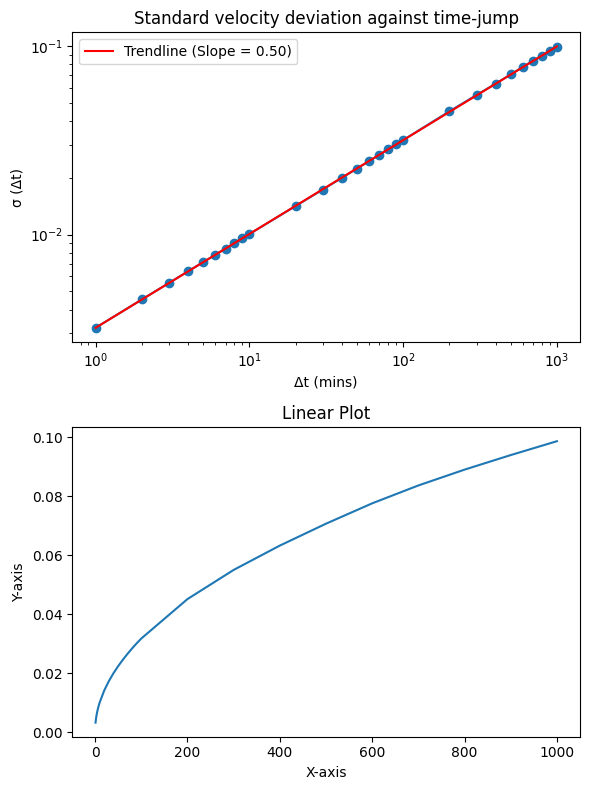

In [7]:
import matplotlib.pyplot as plt
import numpy as np

#results = {'1': 0.0032045201803123516, '2': 0.004528424452189853, '3': 0.005538525816512876, '4': 0.006388793178957317, '5': 0.007136640473178932, '6': 0.0078100441919344045, '7': 0.008428490111898052, '8': 0.009005054720234525, '9': 0.009549792670285873, '10': 0.010061890490620588, '20': 0.014166073324460769, '30': 0.017321202087545125, '40': 0.020002110908091893, '50': 0.022361130126193163, '60': 0.024496654807211707, '70': 0.026478903897898306, '80': 0.028341692360473424, '90': 0.030080629031601382, '100': 0.031709069833486724, '200': 0.045080750283957034, '300': 0.05496757947963504, '400': 0.06321910793696926, '500': 0.07064215083591915, '600': 0.0775460503845981, '700': 0.08360250415820772, '800': 0.08896556885370603, '900': 0.09390068583005222, '1000': 0.09860033158139558}

# Data for the plots
x = list(map(float, results.keys()))
y = list(map(float, results.values()))

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

# Plot 1: Log-log scale
ax1.loglog(x, y, 'o-')
ax1.set_xlabel('Δt (mins)')
ax1.set_ylabel('σ (Δt)')
ax1.set_title('Standard velocity deviation against time-jump')

#Plot 1a: Linear Regression
log_x = np.log10(x)
log_y = np.log10(y)
coefficients = np.polyfit(log_x, log_y, 1)
slope = coefficients[0]
trendline_x = np.array([min(x), max(x)])
trendline_y = 10 ** (coefficients[1] + coefficients[0] * np.log10(trendline_x))
ax1.loglog(trendline_x, trendline_y, 'r-', label=f'Trendline (Slope = {slope:.2f})')
ax1.legend()

# Plot 2: Linear scale
ax2.plot(x, y)
ax2.set_xlabel('X-axis')
ax2.set_ylabel('Y-axis')
ax2.set_title('Linear Plot')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

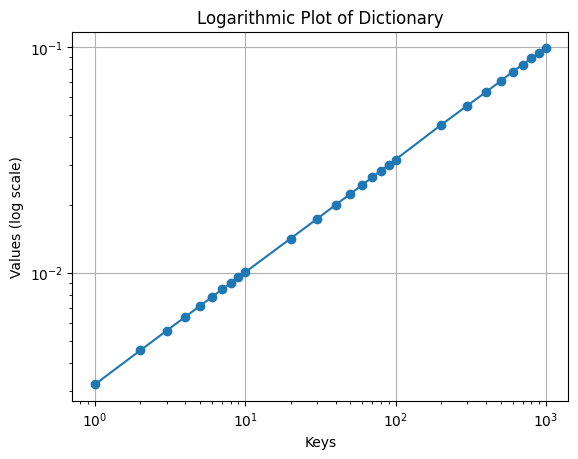

In [8]:
# Extract keys and values from the dictionary
keys    = list(map(float, results.keys()))
values  = list(map(float, results.values()))

# Plot the data using a logarithmic scale
plt.loglog(keys, values, marker='o')

# Set the x-axis notation to scientific notation (base 10)
#plt.gca().xaxis.set_major_formatter(ScalarFormatter())

# Add labels and title
plt.xlabel('Keys')
plt.ylabel('Values (log scale)')
plt.title('Logarithmic Plot of Dictionary')
plt.xscale('log')
#plt.xticks(keys, keys)  # Set custom tick locations and labels
plt.grid(True)

# Display the plot
plt.show()

done
-1.488352943382041e-05


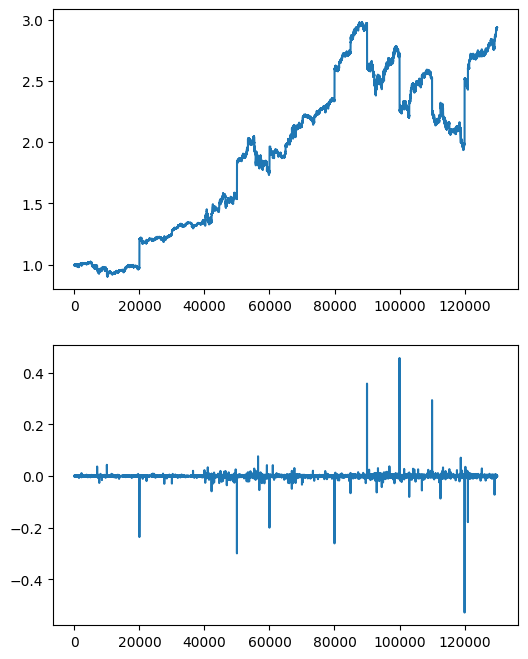

In [41]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))

ax1.plot(df.index, df[df.columns[0]])
ax2.plot(df_velocity)
print(df_velocity['close'].values.mean())

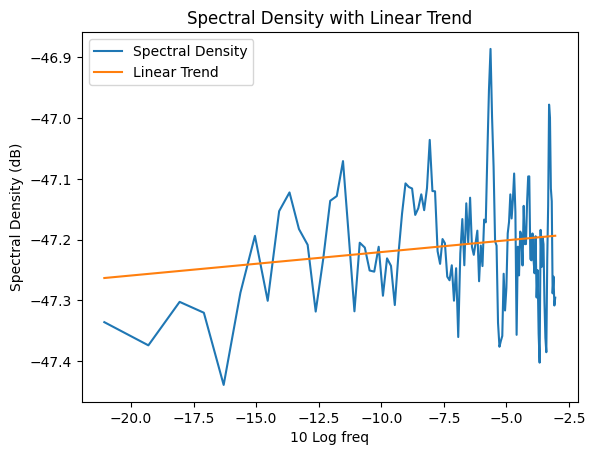

In [32]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate or load your dataset
data = df_velocity['close'].values  # Example: Random data

# Compute the spectral density using the welch method
frequencies, spectral_density = signal.welch(data, fs=1.0)

#remove the anomolies
frequencies         = frequencies[2:-1]
spectral_density    = spectral_density[2:-1]

# Convert frequencies to "10 Log freq"
x = 10 * np.log10(frequencies)

# Convert spectral density to decibels (dB)
y = 10 * np.log10(spectral_density)

# Fit a linear trend to the log-transformed data
coefficients = np.polyfit(x, y, deg=1)

# Calculate the trendline values
trendline = np.polyval(coefficients, x)

# Plot the spectral density with dB y-axis and "10 Log freq" x-axis
plt.plot(x, y, label='Spectral Density')
plt.plot(x, trendline, label='Linear Trend')

plt.xlabel('10 Log freq')
plt.ylabel('Spectral Density (dB)')
plt.title('Spectral Density with Linear Trend')
plt.legend()
plt.show()


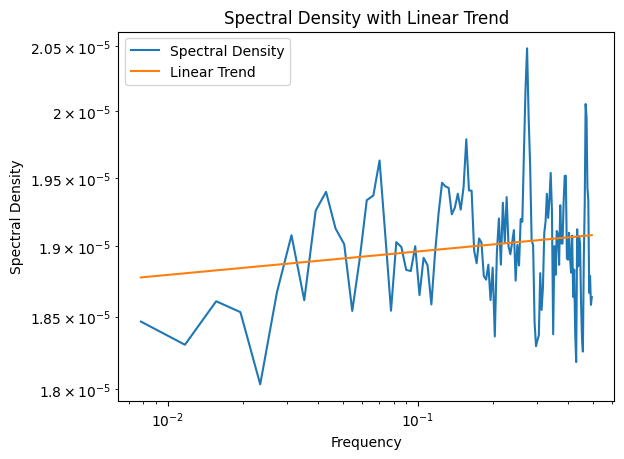

In [26]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate or load your dataset
data = df_velocity['close'].values  # Example: Random data

# Compute the spectral density using the welch method
frequencies, spectral_density = signal.welch(data, fs=1.0)

#remove the anomolies
frequencies         = frequencies[2:-1]
spectral_density    = spectral_density[2:-1]

# Plot the spectral density
plt.loglog(frequencies, spectral_density, label='Spectral Density')

# Fit a linear trend to the spectral density using numpy.polyfit
coefficients = np.polyfit(np.log(frequencies), np.log(spectral_density), deg=1)
linear_trend = np.exp(np.poly1d(coefficients)(np.log(frequencies)))

# Plot the linear trend line
plt.loglog(frequencies, linear_trend, label='Linear Trend')

plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.title('Spectral Density with Linear Trend')
plt.legend()
plt.show()


In [17]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Generate or load your dataset
data = df_velocity['close'].values

# Compute the spectral density using the welch method
frequencies, spectral_density = signal.welch(data, fs=1.0)

# Fit a linear trend to the spectral density using numpy.polyfit
coefficients = np.polyfit(np.log(frequencies), np.log(spectral_density), deg=1)

# Calculate the residuals (errors)
residuals = np.log(spectral_density) - np.polyval(coefficients, np.log(frequencies))

# Set a threshold for excluding outliers
threshold = 2.5  # Adjust as needed

# Identify the indices of the points that are not outliers
good_indices = np.abs(residuals) < threshold * np.std(residuals)

# Plot the spectral density
plt.loglog(frequencies, spectral_density, label='Spectral Density')

# Plot the linear trend line excluding outliers
plt.loglog(frequencies[good_indices], np.exp(np.poly1d(coefficients)(np.log(frequencies[good_indices]))), label='Linear Trend')

plt.xlabel('Frequency')
plt.ylabel('Spectral Density')
plt.title('Spectral Density with Linear Trend (Excluding Outliers)')
plt.legend()
plt.show()


C:\Users\Fabio\AppData\Local\Temp\ipykernel_21312\1656177801.py:12: RuntimeWarning: divide by zero encountered in log
  coefficients = np.polyfit(np.log(frequencies), np.log(spectral_density), deg=1)


LinAlgError: SVD did not converge in Linear Least Squares

In [15]:
print("hello")

hello


In [ ]:
file_path_2 = r"C:\Users\Fabio\Downloads\FLDTCLP99.FLD"

with open(file_path_2, 'rb') as file:
    data = file.read()
print("hello")

hello
